**NAMA: ASYFA NABILLA RAHMI <br>
NIM: 211351033 <br>
KELAS: PAGI A <br>**

#IMPORT DATASET KAGGLE

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asyfanabilla","key":"b1bc6b280d5b450963cadd8a53557d8c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d farjanakabirsamanta/analytics-case-studyecommerce

  0% 0.00/564k [00:00<?, ?B/s]
100% 564k/564k [00:00<00:00, 86.9MB/s]


In [ ]:
!mkdir analytics-case-studyecommerce
!unzip analytics-case-studyecommerce.zip -d analytics-case-studyecommerce
!ls analytics-case-studyecommerce

Archive:  analytics-case-studyecommerce.zip
  inflating: analytics-case-studyecommerce/Analytics case study (market basket analysis ecommerce).csv  
'Analytics case study (market basket analysis ecommerce).csv'


#IMPORT LIBRARY YANG DIBUTUHKAN

In [ ]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=f84abf848d01b676b126a1d2816e09b095561b6b9cda938b90086b846f40f51b
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import association_rules, apriori
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import re

#DATA DISCOVERY

In [ ]:
df = pd.read_csv("/content/analytics-case-studyecommerce/Analytics case study (market basket analysis ecommerce).csv")
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (92250, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
0,3.7V 3400mah LIION 12.6WH,Battery/Consumer Rechargeable,EC0043605902,47,"$1,597.53"
1,3V PHOTO LITHIUM,Battery/Primary Other,EC0043507670,47,"$1,246.44"
2,12V 11.2AH 225CCA AGM 12/0,Battery/Powersports,EC0043504182,41,"$4,714.59"
3,12V 12AH 165CCA FLOODED 6/0,Battery/Powersports,EC0043503186,39,"$2,456.61"
4,12V 12AH 210CCA AGM 12/0,Battery/Powersports,EC0043406547,34,"$3,570.00"


In [ ]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product,Product Category (Enhanced Ecommerce),Transaction ID,Unique Purchases,Product Revenue
32064,12V 27 AGM DUAL MARINE,Battery/Marine/RV,EC0043303761,1,$389.99
38065,12V 31DT DURACELL ULTRA AGM 30,Battery/Marine/RV,EC0043405172,1,$269.99
23430,12V 17.5AH 310 CCA,Battery/Powersports,EC0043803673,1,$159.99
15060,1.5V IND AA ALK BULK,Battery/Primary Common,EC0043506075,1,$23.25
24548,12V 18AH 310CCA AGM 12/0,Battery/Powersports,EC0043509859,1,$233.98
7800,24PK 1.5V AAA ALKALINE,Battery/Primary Common,EC0043105050,2,$37.98
50917,12V 94R ULTRA GOLD 36,Battery/Auto/Light Truck,EC0043008108,1,$179.99
35731,12V 30AH 400 CCA,Battery/Powersports,EC0043707256,1,$184.99
42840,12V 48 ULTRA GOLD 36,Battery/Auto/Light Truck,EC0043709054,1,$194.99
74308,9V 1200MAH LITHIUM 11WH,Battery/Primary Other,EC0043708796,1,$479.60


In [ ]:
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.5+ MB


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unique Purchases
count,92250.000000
mean,1.164564
std,0.676474
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,47.000000


In [ ]:
val_counts = df["Product Category (Enhanced Ecommerce)"].value_counts()
val_counts.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bulb - Plus Product/Bulb Plus Product    2
Accessory/Key Fob                        2
Bulb/Emergency                           1
Bulb/Sealed Beam                         1
<nested product category>                1
Charger/Power Equipment                  1
Charger/HHD                              1
Bulb - Ballast/Driver                    1
/                                        1
Device/Smart Home                        1
Name: Product Category (Enhanced Ecommerce), dtype: int64

#EDA

In [ ]:
df = df.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = df[df['Unique Purchases']>=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92250 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92250 non-null  object
 1   Product Category (Enhanced Ecommerce)  92250 non-null  object
 2   Transaction ID                         92250 non-null  object
 3   Unique Purchases                       92250 non-null  int64 
 4   Product Revenue                        92250 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.drop(df[df['Transaction ID'] == '<transaction id>'].index, inplace=True)
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 92249 entries, 0 to 92249
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Product                                92249 non-null  object
 1   Product Category (Enhanced Ecommerce)  92249 non-null  object
 2   Transaction ID                         92249 non-null  object
 3   Unique Purchases                       92249 non-null  int64 
 4   Product Revenue                        92249 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.2+ MB


In [ ]:
val_counts = dict(df["Product Category (Enhanced Ecommerce)"].value_counts()[:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


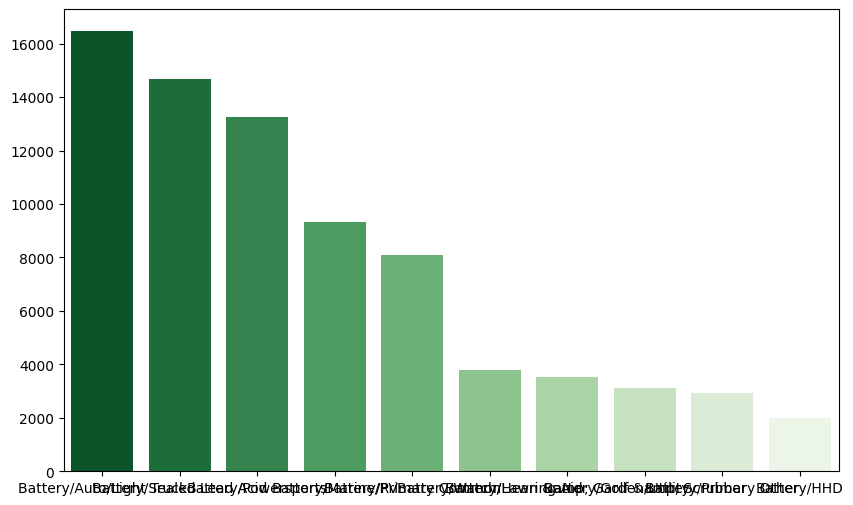

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")
plt.show()

In [ ]:
val_counts = dict(df["Product"].value_counts()[:5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


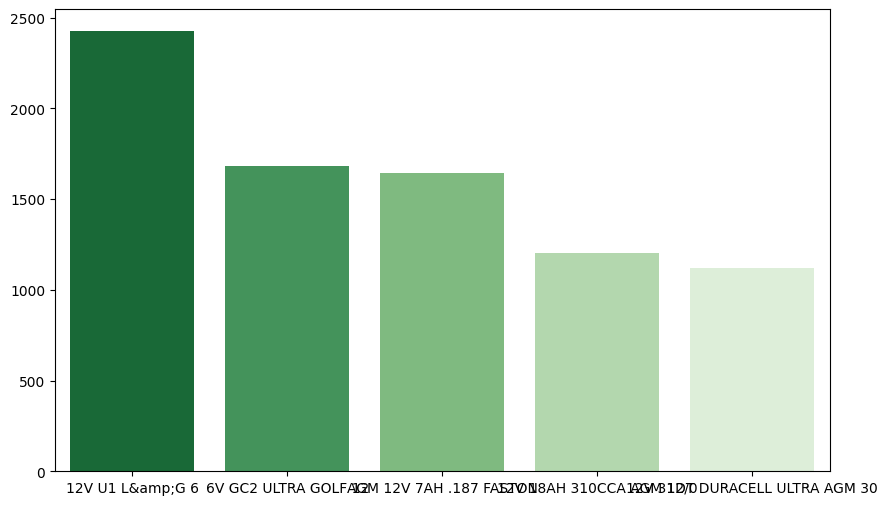

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(val_counts.keys()), y=list(val_counts.values()), palette="Greens_r")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


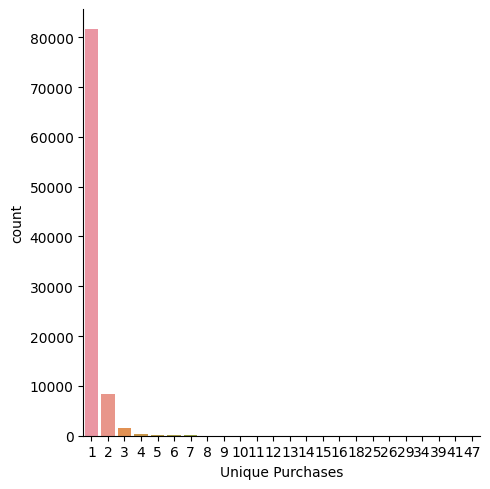

In [ ]:
sns.catplot(x="Unique Purchases",data=df,kind="count")

In [ ]:
unique_purchases = dict(df.groupby('Unique Purchases')['Product'].count().sort_values(ascending=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


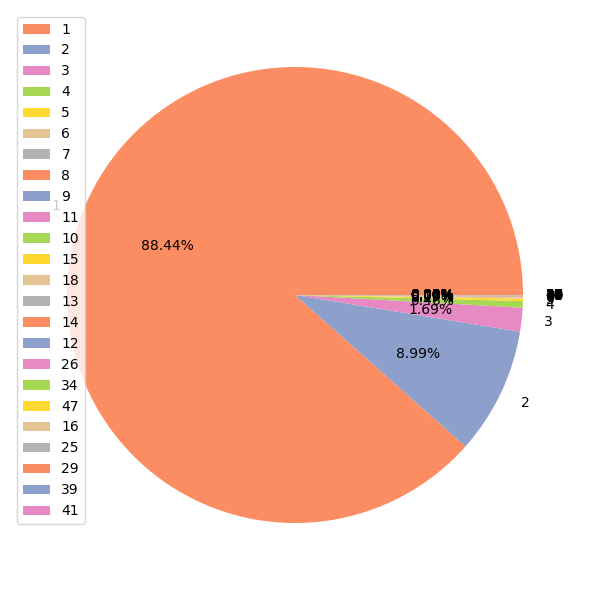

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(unique_purchases.values(), labels=unique_purchases.keys(), colors=sns.color_palette("Set2")[1:], autopct='%.2f%%')
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
product = df['Product'].value_counts().sort_values(ascending=False)
product.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12V U1 L&amp;G 6                  2425
6V GC2 ULTRA GOLF 12              1684
AGM 12V 7AH .187 FASTON           1642
12V 18AH 310CCA AGM 12/0          1204
12V 31DT DURACELL ULTRA AGM 30    1118
AGM 12V 5AH .187 FASTON           1077
DC 12V 35AH J TERM                1005
12V 17.5AH 310 CCA                 996
1.5V IND AA ALK BULK               979
1.5V ALKAL                         977
Name: Product, dtype: int64

In [ ]:
fig = px.bar(product.head(20), title='20 Most Frequent Product', color=product.head(20), color_continuous_scale=px.colors.sequential.Mint)
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0), titlefont=dict(size=20), xaxis_tickangle=-45, plot_bgcolor='white', coloraxis_showscale=False)
fig.update_yaxes(showticklabels=False, title=' ')
fig.update_xaxes(title=' ')
fig.update_traces(texttemplate='%{y}', textposition='outside', hovertemplate = '<b>%{x}</b><br>No. of Transactions: %{y}')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
unique_purchases = df.groupby('Unique Purchases')['Product'].count().sort_values(ascending=False)
unique_purchases

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Unique Purchases
1     81584
2      8291
3      1555
4       425
5       159
6        83
7        52
8        35
9        25
11        7
10        6
15        4
18        4
13        4
14        2
12        2
26        2
34        2
47        2
16        1
25        1
29        1
39        1
41        1
Name: Product, dtype: int64

In [ ]:
fig = go.Figure(data=[go.Pie(labels=['1', '2', '3', '4', '5', '6'],
                values=unique_purchases, title="Unique Purchases",titlefont=dict(size=20), textinfo='label+percent', marker=dict(colors=px.colors.sequential.Mint), hole=.5)])
fig.update_layout(margin=dict(t=40, b=40, l=0, r=0), font=dict(size=13), showlegend=False)
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#DATA PREPARATION

In [ ]:
df["Product"] = df["Product"].apply(lambda product: product.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df["Product"] = df["Product"].apply(lambda product: product.strip())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
df = df[["Transaction ID", "Product"]].copy()
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Transaction ID,Product
0,EC0043605902,3.7v 3400mah liion 12.6wh
1,EC0043507670,3v photo lithium
2,EC0043504182,12v 11.2ah 225cca agm 12/0
3,EC0043503186,12v 12ah 165cca flooded 6/0
4,EC0043406547,12v 12ah 210cca agm 12/0
5,EC0043406547,12v 12ah 220cca agm
6,EC0042903780,6v 4ah lead oe jr blue batt fisher price
7,EC0043607259,12v 31 marine dc 12
8,EC0043506900,6v 2100mah nimh
9,EC0043208361,3.6v 1200mah lithi


In [ ]:
product_count = df.groupby(["Transaction ID", "Product"])["Product"].count().reset_index(name="Count")
product_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Transaction ID,Product,Count
0,1234,(not set),1
1,123456,(not set),1
2,12345678,(not set),1
3,EC0032704676,3v lithium cr2032 bulk,1
4,EC0032704676,inspector pocket light,1
5,EC0032704676,xtreme high performance 12a-a powersport battery,1
6,EC0042407100,duracell ultra gold flooded 800cca bci group 3...,1
7,EC0042508772,replacement battery for select universal and f...,1
8,EC0042607412,duracell ultra flooded 680cca bci group 48 hea...,1
9,EC0042609230,duracell ultra platinum agm 800cca bci group 9...,1


In [ ]:
product_count_pivot = product_count.pivot_table(index='Transaction ID', columns='Product', values='Count', aggfunc='sum').fillna(0)
print("Dataset Size:", product_count_pivot.shape)
product_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Dataset Size: (83013, 2411)


Product,(4)f32t8 centium is unv,(not set),1 bank 10a onboard battery charger,1 bank 5a onboard battery charger,1.2v 1100mah nicad,1.2v 12000mah nimh,1.2v 1200mah nicad,1.2v 1200mah nicad 4/5a,1.2v 1200mah nimh,1.2v 1400mah nicad 4/5a,...,y50-n18l-a w/metal jacket,yb16l-b w/metal jacket,yeti 1500x portable power station,yeti 200x portable power,yeti 3000x portable power station,yeti 400 protection case,yeti 500x portable power station,zbug lantern + light,zus smart vehicle health monitor mini,zus universal car audio adapter
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123456,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12345678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0032704676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC0042407100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
product_count_pivot = product_count_pivot.astype("int32")
product_count_pivot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Product,(4)f32t8 centium is unv,(not set),1 bank 10a onboard battery charger,1 bank 5a onboard battery charger,1.2v 1100mah nicad,1.2v 12000mah nimh,1.2v 1200mah nicad,1.2v 1200mah nicad 4/5a,1.2v 1200mah nimh,1.2v 1400mah nicad 4/5a,...,y50-n18l-a w/metal jacket,yb16l-b w/metal jacket,yeti 1500x portable power station,yeti 200x portable power,yeti 3000x portable power station,yeti 400 protection case,yeti 500x portable power station,zbug lantern + light,zus smart vehicle health monitor mini,zus universal car audio adapter
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12345678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042407100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 1:
    return 1

product_count_pivot = product_count_pivot.applymap(encode)
product_count_pivot.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Product,(4)f32t8 centium is unv,(not set),1 bank 10a onboard battery charger,1 bank 5a onboard battery charger,1.2v 1100mah nicad,1.2v 12000mah nimh,1.2v 1200mah nicad,1.2v 1200mah nicad 4/5a,1.2v 1200mah nimh,1.2v 1400mah nicad 4/5a,...,y50-n18l-a w/metal jacket,yb16l-b w/metal jacket,yeti 1500x portable power station,yeti 200x portable power,yeti 3000x portable power station,yeti 400 protection case,yeti 500x portable power station,zbug lantern + light,zus smart vehicle health monitor mini,zus universal car audio adapter
Transaction ID,,,,,,,,,,,,,,,,,,,,,
1234,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123456,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12345678,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042407100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
product_count_pivot = product_count_pivot[(product_count_pivot > 0).sum(axis=1) >= 2]
product_count_pivot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Product,(4)f32t8 centium is unv,(not set),1 bank 10a onboard battery charger,1 bank 5a onboard battery charger,1.2v 1100mah nicad,1.2v 12000mah nimh,1.2v 1200mah nicad,1.2v 1200mah nicad 4/5a,1.2v 1200mah nimh,1.2v 1400mah nicad 4/5a,...,y50-n18l-a w/metal jacket,yb16l-b w/metal jacket,yeti 1500x portable power station,yeti 200x portable power,yeti 3000x portable power station,yeti 400 protection case,yeti 500x portable power station,zbug lantern + light,zus smart vehicle health monitor mini,zus universal car audio adapter
Transaction ID,,,,,,,,,,,,,,,,,,,,,
EC0032704676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042801384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042802882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042803407,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0042803469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EC0044007261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EC0044007269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Dataset Size: ", product_count_pivot.shape)
print("Total Transaksi: ", product_count_pivot.shape[0])
print("Total Produk: ", product_count_pivot.shape[1])

Dataset Size:  (6321, 2411)
Total Transaksi:  6321
Total Produk:  2411


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
frequent_itemsets_plus = apriori(product_count_pivot, min_support=0.03,
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.115013,(1.5v ind aa alk bulk),1
1,0.111691,(1.5v ind aaa alk bulk),1
2,0.098719,(1.5v alkal),1
3,0.086062,"(1.5v ind aaa alk bulk, 1.5v ind aa alk bulk)",2
4,0.079418,(1.5v alkaline aa contractor 24pk),1
5,0.056320,(d alkaline bulk),1
6,0.051732,"(1.5v alkaline aa contractor 24pk, 1.5v alkal)",2
7,0.042240,(9v ind alk bulk),1
8,0.037810,(24pk 1.5v aa alkaline),1
9,0.036228,(c alkaline bulk),1


#MODELING

In [ ]:
frequent_itemsets_plus[frequent_itemsets_plus['length'] == 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
0,0.115013,(1.5v ind aa alk bulk),1
1,0.111691,(1.5v ind aaa alk bulk),1
2,0.098719,(1.5v alkal),1
4,0.079418,(1.5v alkaline aa contractor 24pk),1
5,0.056320,(d alkaline bulk),1
7,0.042240,(9v ind alk bulk),1
8,0.037810,(24pk 1.5v aa alkaline),1
9,0.036228,(c alkaline bulk),1
11,0.030059,(1.5v alkaline d contractor 12pk),1


In [ ]:
frequent_itemsets_plus[frequent_itemsets_plus['length'] == 2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets,length
3,0.086062,"(1.5v ind aaa alk bulk, 1.5v ind aa alk bulk)",2
6,0.051732,"(1.5v alkaline aa contractor 24pk, 1.5v alkal)",2
10,0.031641,"(d alkaline bulk, 1.5v ind aa alk bulk)",2
12,0.030059,"(d alkaline bulk, 1.5v ind aaa alk bulk)",2


#VISUALISASI HASIL MODELING

In [ ]:
rules = association_rules(frequent_itemsets_plus, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1.5v ind aa alk bulk),(1.5v ind aaa alk bulk),0.115013,0.111691,0.086062,0.748281,6.699549,0.073216,3.528965,0.961298
1,(1.5v ind aaa alk bulk),(1.5v ind aa alk bulk),0.111691,0.115013,0.086062,0.770538,6.699549,0.073216,3.856793,0.957703
2,(1.5v alkal),(1.5v alkaline aa contractor 24pk),0.098719,0.079418,0.051732,0.524038,6.598500,0.043892,1.934152,0.941382
3,(1.5v alkaline aa contractor 24pk),(1.5v alkal),0.079418,0.098719,0.051732,0.651394,6.598500,0.043892,2.585390,0.921645
4,(d alkaline bulk),(1.5v ind aa alk bulk),0.056320,0.115013,0.031641,0.561798,4.884627,0.025163,2.019585,0.842739
5,(1.5v ind aa alk bulk),(d alkaline bulk),0.115013,0.056320,0.031641,0.275103,4.884627,0.025163,1.301813,0.898631
6,(d alkaline bulk),(1.5v ind aaa alk bulk),0.056320,0.111691,0.030059,0.533708,4.778424,0.023768,1.905048,0.837918
7,(1.5v ind aaa alk bulk),(d alkaline bulk),0.111691,0.056320,0.030059,0.269122,4.778424,0.023768,1.291159,0.890148


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



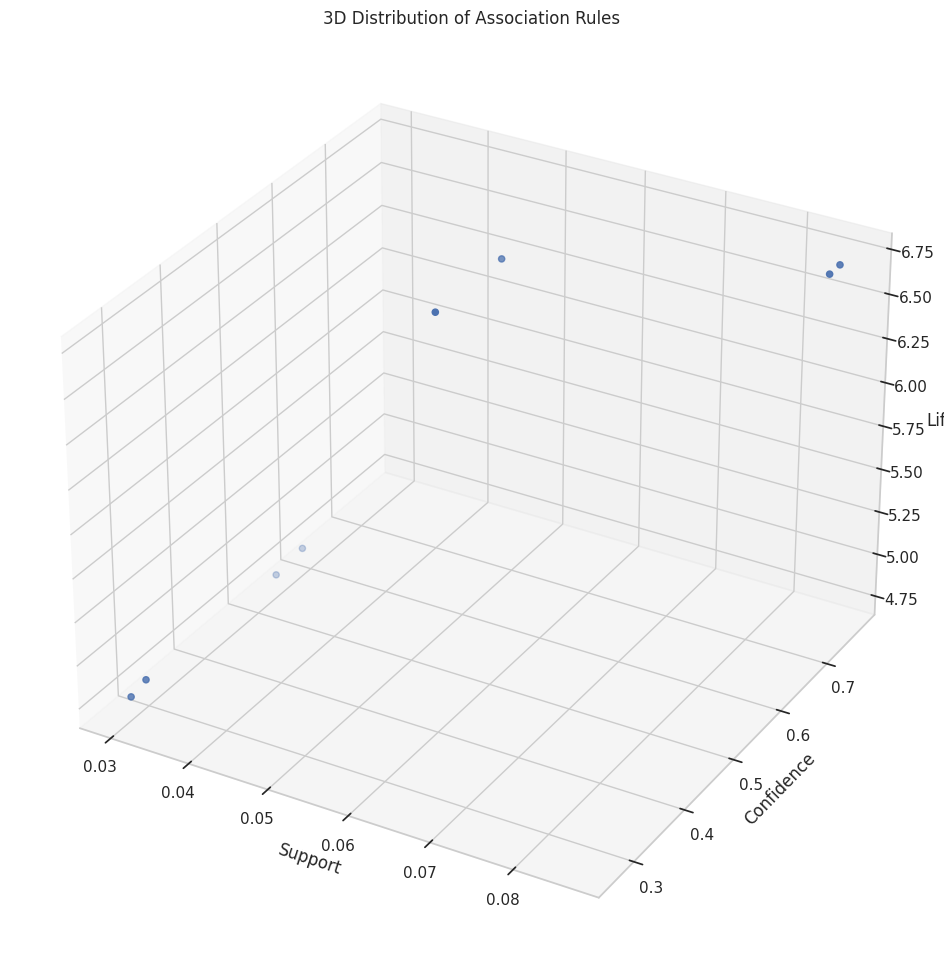

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<>:16: DeprecationWarning:

invalid escape sequence '\d'

<>:16: DeprecationWarning:

invalid escape sequence '\d'

<ipython-input-41-594e1e0627e3>:16: DeprecationWarning:

invalid escape sequence '\d'



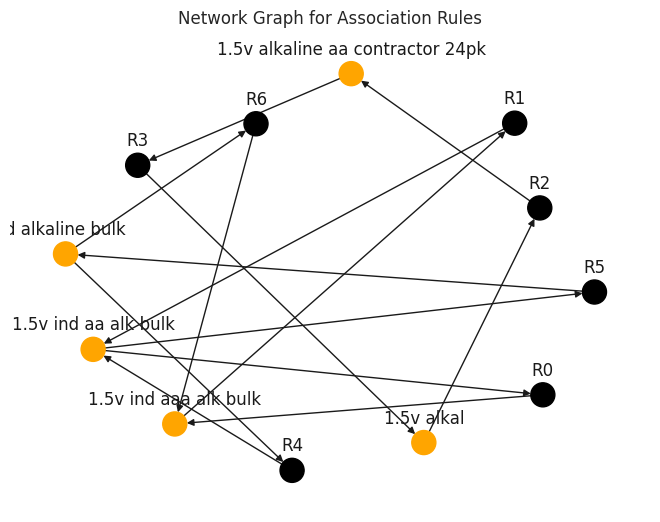

In [ ]:
def draw_network(rules, rules_to_show):
    network = nx.DiGraph()
    for i in range(rules_to_show):
        network.add_nodes_from(["R" + str(i)])
        for antecedents in rules.iloc[i]['antecedents']:
            network.add_nodes_from([antecedents])
            network.add_edge(antecedents, "R" + str(i), weight=2)

        for consequents in rules.iloc[i]['consequents']:
            network.add_nodes_from([consequents])
            network.add_edge("R" + str(i), consequents, weight=2)

    color_map = []

    for node in network:
        if re.compile("^[R]\d+$").fullmatch(node) is not None:
            color_map.append('black')
        else:
            color_map.append('orange')

    pos = nx.spring_layout(network, k=16, scale=1)

    nx.draw(network, pos, node_color=color_map, font_size=8)

    for p in pos:
        pos[p][1] += 0.12

    nx.draw_networkx_labels(network, pos)

    plt.title("Network Graph for Association Rules")
    plt.show()

draw_network(rules, 7)
